In [2]:
import h5py
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import lcpfn 
from lcpfn import bar_distribution, encoders
from lcpfn import train as lctrain

# create folder
import sys
import os
main_path = os.path.abspath(os.path.join(os.getcwd(), ''))
if main_path not in sys.path:
    sys.path.insert(0, main_path)

print(f"Project path: {main_path}")

TRAINING_NAME = 'training-experiment1'
experiments_path = f"{main_path}/{TRAINING_NAME}"
os.makedirs(experiments_path, exist_ok=True)

### Load LCDB 1.1 data

In [3]:
### hyperparameter
OPENML_ID = {0: '3', 1: '6', 2: '11', 3: '12', 4: '13', 5: '14', 6: '15', 7: '16', 8: '18', 9: '21', 10: '22', 11: '23', 12: '24', 13: '26', 14: '28', 15: '29', 16: '30', 17: '31', 18: '32', 19: '36', 20: '37', 21: '38', 22: '44', 23: '46', 24: '50', 25: '54', 26: '55', 27: '57', 28: '60', 29: '61', 30: '151', 31: '179', 32: '180', 33: '181', 34: '182', 35: '184', 36: '185', 37: '188', 38: '201', 39: '273', 40: '293', 41: '299', 42: '300', 43: '307', 44: '336', 45: '346', 46: '351', 47: '354', 48: '357', 49: '380', 50: '389', 51: '390', 52: '391', 53: '392', 54: '393', 55: '395', 56: '396', 57: '398', 58: '399', 59: '401', 60: '446', 61: '458', 62: '469', 63: '554', 64: '679', 65: '715', 66: '718', 67: '720', 68: '722', 69: '723', 70: '727', 71: '728', 72: '734', 73: '735', 74: '737', 75: '740', 76: '741', 77: '743', 78: '751', 79: '752', 80: '761', 81: '772', 82: '797', 83: '799', 84: '803', 85: '806', 86: '807', 87: '813', 88: '816', 89: '819', 90: '821', 91: '822', 92: '823', 93: '833', 94: '837', 95: '843', 96: '845', 97: '846', 98: '847', 99: '849', 100: '866', 101: '871', 102: '881', 103: '897', 104: '901', 105: '903', 106: '904', 107: '910', 108: '912', 109: '913', 110: '914', 111: '917', 112: '923', 113: '930', 114: '934', 115: '953', 116: '958', 117: '959', 118: '962', 119: '966', 120: '971', 121: '976', 122: '977', 123: '978', 124: '979', 125: '980', 126: '991', 127: '993', 128: '995', 129: '1000', 130: '1002', 131: '1018', 132: '1019', 133: '1020', 134: '1021', 135: '1036', 136: '1040', 137: '1041', 138: '1042', 139: '1049', 140: '1050', 141: '1053', 142: '1056', 143: '1063', 144: '1067', 145: '1068', 146: '1069', 147: '1083', 148: '1084', 149: '1085', 150: '1086', 151: '1087', 152: '1088', 153: '1116', 154: '1119', 155: '1120', 156: '1128', 157: '1130', 158: '1134', 159: '1138', 160: '1139', 161: '1142', 162: '1146', 163: '1161', 164: '1166', 165: '1216', 166: '1233', 167: '1235', 168: '1236', 169: '1441', 170: '1448', 171: '1450', 172: '1457', 173: '1461', 174: '1462', 175: '1464', 176: '1465', 177: '1468', 178: '1475', 179: '1477', 180: '1478', 181: '1479', 182: '1480', 183: '1483', 184: '1485', 185: '1486', 186: '1487', 187: '1488', 188: '1489', 189: '1494', 190: '1497', 191: '1499', 192: '1501', 193: '1503', 194: '1509', 195: '1510', 196: '1515', 197: '1566', 198: '1567', 199: '1575', 200: '1590', 201: '1592', 202: '1597', 203: '4134', 204: '4135', 205: '4137', 206: '4534', 207: '4538', 208: '4541', 209: '6332', 210: '23381', 211: '23512', 212: '23517', 213: '40498', 214: '40499', 215: '40664', 216: '40668', 217: '40670', 218: '40672', 219: '40677', 220: '40685', 221: '40687', 222: '40701', 223: '40713', 224: '40900', 225: '40910', 226: '40923', 227: '40927', 228: '40966', 229: '40971', 230: '40975', 231: '40978', 232: '40979', 233: '40981', 234: '40982', 235: '40983', 236: '40984', 237: '40994', 238: '40996', 239: '41027', 240: '41142', 241: '41143', 242: '41144', 243: '41145', 244: '41146', 245: '41150', 246: '41156', 247: '41157', 248: '41158', 249: '41159', 250: '41161', 251: '41163', 252: '41164', 253: '41165', 254: '41166', 255: '41167', 256: '41168', 257: '41169', 258: '41228', 259: '41972', 260: '42734', 261: '42742', 262: '42769', 263: '42809', 264: '42810'}
LEARNER_ZOO = {0: 'SVC_linear', 1: 'SVC_poly', 2: 'SVC_rbf', 3: 'SVC_sigmoid', 4: 'Decision Trees', 5: 'ExtraTrees', 6: 'LogisticRegression', 7: 'PassiveAggressive', 8: 'Perceptron', 9: 'RidgeClassifier', 10: 'SGDClassifier', 11: 'MLP', 12: 'LDA', 13: 'QDA', 14: 'BernoulliNB', 15: 'MultinomialNB', 16: 'ComplementNB', 17: 'GaussianNB', 18: 'KNN', 19: 'NearestCentroid', 20: 'ens.ExtraTrees', 21: 'ens.RandomForest', 22: 'ens.GradientBoosting', 23: 'DummyClassifier'}
ANCHOR_SIZE = np.ceil(16 * 2 ** ((np.arange(137)) / 8)).astype(int)

### load data: validation accuracy
lc_data = h5py.File('../input/lcdb11-acc-265-nofs-raw-compress/LCDB11_ACC_265_noFS_raw_compress.hdf5', 'r')['accuracy'][...][:,:,:,:,:,1]

mean_valid_lc_nofs =np.nanmean(lc_data, axis=(2, 3))

In [4]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

# Shape groups
flat_learners_indices = [1, 2, 3, 14]
mono_conv_learners_indices = [0, 4, 5, 20, 21, 22, 6, 7, 8, 10, 18]
peaking_learner_indices = [3, 9, 11, 12, 13, 17]
dipping_learner_indices = [3, 19, 13, 12, 17]

n_datasets = len(OPENML_ID)
n_learners = len(LEARNER_ZOO) - 1  # Exclude DummyClassifier

all_pairs = []
for dataset_idx in range(n_datasets):
    for learner_idx in range(n_learners):
        all_pairs.append((dataset_idx, learner_idx))

all_pairs = np.array(all_pairs)
print(f"Total combinations: {len(all_pairs)}")

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

train_pair_indices, test_pair_indices = train_test_split(
    np.arange(len(all_pairs)),
    test_size=0.2,
    random_state=SEED,
    stratify=all_pairs[:, 1]
)

train_pairs = all_pairs[train_pair_indices]
test_pairs = all_pairs[test_pair_indices]

print(f"Train pairs: {len(train_pairs)}")
print(f"Test pairs: {len(test_pairs)}")

def extract_curves_with_metadata(pairs, lc_data):
    curves = []
    curve_lengths = []
    dataset_indices = []
    learner_indices = []

    for dataset_idx, learner_idx in pairs:
        curve = np.nanmean(lc_data[dataset_idx, learner_idx, :, :, :], axis=(0, 1))
        curve_length = np.count_nonzero(~np.isnan(curve))

        if curve_length > 0:
            curves.append(curve)
            curve_lengths.append(curve_length)
            dataset_indices.append(dataset_idx)
            learner_indices.append(learner_idx)

    return curves, curve_lengths, dataset_indices, learner_indices

train_curves, train_curve_lengths, train_dataset_indices, train_learner_indices = extract_curves_with_metadata(train_pairs, lc_data)
test_curves, test_curve_lengths, test_dataset_indices, test_learner_indices = extract_curves_with_metadata(test_pairs, lc_data)

print(f"Train curves: {len(train_curves)}")
print(f"Test curves: {len(test_curves)}")

def filter_by_characteristic(curves, curve_lengths, dataset_indices, learner_indices, characteristic_learner_indices):
    """Filter curves based on learner characteristic"""
    filtered_curves = []
    filtered_lengths = []
    filtered_dataset_indices = []
    filtered_learner_indices = []

    for i, learner_idx in enumerate(learner_indices):
        if learner_idx in characteristic_learner_indices:
            filtered_curves.append(curves[i])
            filtered_lengths.append(curve_lengths[i])
            filtered_dataset_indices.append(dataset_indices[i])
            filtered_learner_indices.append(learner_idx)

    return filtered_curves, filtered_lengths, filtered_dataset_indices, filtered_learner_indices

# Get training curves for mono_conv learners
train_mono_conv_curves, train_mono_conv_lengths, train_mono_conv_datasets, train_mono_conv_learners = filter_by_characteristic(
    train_curves, train_curve_lengths, train_dataset_indices, train_learner_indices, mono_conv_learners_indices
)

print(f"Train mono_conv curves: {len(train_mono_conv_curves)}")

# Get test curves for flat learners
test_flat_curves, test_flat_lengths, test_flat_datasets, test_flat_learners = filter_by_characteristic(
    test_curves, test_curve_lengths, test_dataset_indices, test_learner_indices, flat_learners_indices
)

print(f"Test flat curves: {len(test_flat_curves)}")

def create_binary_split(curves, curve_lengths, dataset_indices, learner_indices, characteristic_indices):
    """Create binary split: characteristic vs non-characteristic"""
    char_curves, char_lengths, char_datasets, char_learners = filter_by_characteristic(
        curves, curve_lengths, dataset_indices, learner_indices, characteristic_indices
    )

    non_char_curves, non_char_lengths, non_char_datasets, non_char_learners = filter_by_characteristic(
        curves, curve_lengths, dataset_indices, learner_indices,
        [i for i in range(23) if i not in characteristic_indices]  # All except characteristic
    )

    return (char_curves, char_lengths, char_datasets, char_learners), \
           (non_char_curves, non_char_lengths, non_char_datasets, non_char_learners)

# Create mono_conv vs non-mono_conv split for training data
(train_mono_conv, train_non_mono_conv) = create_binary_split(
    train_curves, train_curve_lengths, train_dataset_indices, train_learner_indices,
    mono_conv_learners_indices
)

print(f"Train mono_conv: {len(train_mono_conv[0])} curves")
print(f"Train non-mono_conv: {len(train_non_mono_conv[0])} curves")

# Find all SVM_poly curves (index 1) in training set
svm_poly_train_curves = []
for i, learner_idx in enumerate(train_learner_indices):
    if learner_idx == 1:  # SVM_poly
        svm_poly_train_curves.append(train_curves[i])

print(f"SVM_poly curves in training set: {len(svm_poly_train_curves)}")

Total combinations: 6095
Train pairs: 4876
Test pairs: 1219
Train curves: 4727
Test curves: 1185
Train mono_conv curves: 2322
Test flat curves: 212
Train mono_conv: 2322 curves
Train non-mono_conv: 2405 curves
SVM_poly curves in training set: 211


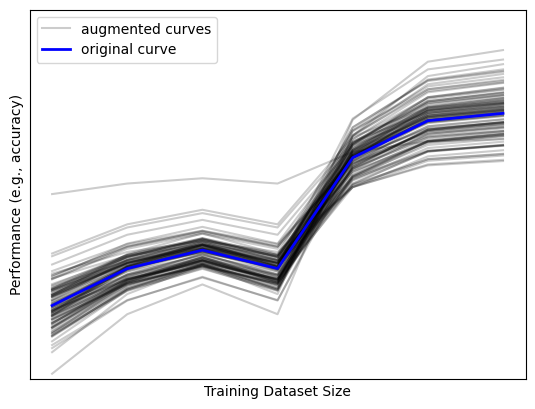

In [5]:
def augment(y, n_anchors):
    y_min = np.nanmin(y)
    y_max = np.nanmax(y)
    if y_min >= y_max:
        return y
    anchors = np.random.uniform(0,1,(n_anchors,))
    anchors.sort()
    min_diff = 10**10
    y_final = None
    for i in range(n_anchors):
        a_i = anchors[i]
        for j in range(i+1, n_anchors):
            a_j = anchors[j]
            y_transformed = (a_j - a_i) / (y_max - y_min) * (y - y_min) + a_i
            error = np.nansum((y - y_transformed)**2)
            if error < min_diff:
                min_diff = error
                y_final = y_transformed
                #print(f"{y_transformed} ([{a_i},{a_j}], error: {error})")
    return y_final
    
y = np.array([0.2,0.3, 0.35, 0.3, 0.6, 0.7, 0.72])
for i in range(100):
    yy = augment(y, n_anchors=10)
    if i==0:
        plt.plot(yy,color="k",alpha=0.2, label="augmented curves")
    else:
        plt.plot(yy,color="k",alpha=0.2)
ax = plt.gca()

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("Training Dataset Size")
plt.ylabel("Performance (e.g., accuracy)")
plt.ylim([0,1])
plt.plot(y,color="blue", linewidth=2, label="original curve")
plt.legend()

### Extrapolation using LC-PFN

In [6]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

# create a single eval pos, seq len samplers
class LCDB_samplers():
    # pick a training task, note that if multiple training tasks have the same length curves, the eventual batch will contain a mixture

    def __init__(self, max_seq_len, rng=np.random, verbose=False):
        self.max_seq_len = max_seq_len
        self.rng = rng
        self.verbose = verbose
        self.current_length = None

    def seq_len(self):
        """Sample a sequence length from available curve lengths."""
        # Get valid curve lengths (this should match your batch function logic)
        valid_lengths = [clen for clen in train_curve_lengths
                        if (clen <= self.max_seq_len and clen >= 2)]

        if not valid_lengths:
            self.current_length = self.max_seq_len
        else:
            self.current_length = self.rng.choice(valid_lengths)

        if self.verbose:
            print(f"Sampled seq_len: {self.current_length}")

        return self.current_length

    def single_eval_pos(self):
        """Generate evaluation position based on current sequence length."""
        if self.current_length is None:
            # Fallback if seq_len wasn't called first
            self.current_length = self.rng.choice([clen for clen in train_curve_lengths
                                                 if (clen <= self.max_seq_len and clen >= 2)])

        # Generate position in the latter part of the sequence for better training
        min_pos = max(1, self.current_length // 2)
        max_pos = self.current_length - 1

        if max_pos >= min_pos:
            sep = self.rng.randint(min_pos, max_pos + 1)
        else:
            sep = max(0, self.current_length - 1)

        if self.verbose:
            print(f"Generated eval_pos: {sep} for length {self.current_length}")

        return sep

#lcdb_sampler = LCDB_samplers(verbose=False)

#for _ in range(3):
#    print((lcdb_sampler.seq_len(), lcdb_sampler.single_eval_pos()))

In [7]:
AUGMENT = True

In [13]:
# generating batches from the LCDB dataset
def get_batch_lcdb_real( batch_size, seq_len, num_features, device="cpu", noisy_target=True, **_ ):
    assert num_features == 1
    assert noisy_target

    # Sample a target sequence length for this entire batch
    valid_lengths = [clen for clen in train_curve_lengths if (clen <= seq_len and clen >= 2)]
    if not valid_lengths:
        raise ValueError(f"No curves found with length between 2 and {seq_len}")
    
    # Choose one sequence length for this batch
    target_seq_len = np.random.choice(valid_lengths)
    
    # Find all curves that have exactly this length (or can be truncated to this length)
    candidates = [cid for (cid, clen) in enumerate(train_curve_lengths) 
                 if clen >= target_seq_len]
    
    if len(candidates) == 0:
        # Fallback: use curves of exact length
        candidates = [cid for (cid, clen) in enumerate(train_curve_lengths) 
                     if clen == target_seq_len]
    
    if len(candidates) == 0:
        raise ValueError(f"No curves found for target length {target_seq_len}")
    
    cids = np.random.choice(candidates, batch_size)
    
    # Use the target sequence length for all sequences in this batch
    batch_seq_len = target_seq_len
    
    # Initialize arrays
    x = np.zeros((batch_size, batch_seq_len), dtype=float)
    y_target = np.zeros((batch_size, batch_seq_len), dtype=float)
    y_noisy = np.zeros((batch_size, batch_seq_len), dtype=float)
    
    for i, cid in enumerate(cids):
        curve = train_curves[cid]
        if AUGMENT:
            curve = augment(curve, n_anchors=10)
        
        # Extract non-NaN values up to target length
        valid_positions = []
        valid_values = []
        
        for j, y in enumerate(curve):
            if not np.isnan(y) and len(valid_positions) < batch_seq_len:
                valid_positions.append(j + 1)  # 1-indexed positions
                valid_values.append(y)
        
        # Fill arrays with curve data up to batch_seq_len
        for token_idx in range(min(len(valid_positions), batch_seq_len)):
            x[i, token_idx] = valid_positions[token_idx]
            y_target[i, token_idx] = valid_values[token_idx]
            y_noisy[i, token_idx] = valid_values[token_idx]
    
    # Convert to torch tensors
    x = torch.from_numpy(x).transpose(0, 1).unsqueeze(-1).float().to(device)
    y_target = torch.from_numpy(y_target).transpose(0, 1).float().to(device)
    y_noisy = torch.from_numpy(y_noisy).transpose(0, 1).float().to(device)
    
    return x, y_noisy, y_target

def train_lcdbpfn(get_batch_func, max_seq_len, emsize, nlayers, num_borders, lr, batch_size, epochs):
    """Training function that supports variable sequence lengths."""
    # training hyperparameters
    hps = {}

    # Create variable-length sampler
    sampler = LCDB_samplers(max_seq_len=max_seq_len, verbose=False)

    # PFN training hyperparameters
    dataloader = lcpfn.priors.utils.get_batch_to_dataloader(get_batch_func)
    num_features = 1

    # Prepare bucket limits
    ys = []
    for curve in train_curves:
        ys.extend([y for y in curve if not np.isnan(y)])
    ys = torch.FloatTensor(ys)
    ys = torch.normal(ys, 1e-5)
    bucket_limits = bar_distribution.get_bucket_limits(num_borders, ys=ys)

    # Discretization of the predictive distributions
    criterions = {
        num_features: {
            num_borders: bar_distribution.FullSupportBarDistribution(bucket_limits)
        }
    }

    config = dict(
        nlayers=nlayers,
        priordataloader_class=dataloader,
        criterion=criterions[num_features][num_borders],
        encoder_generator=lambda in_dim, out_dim: torch.nn.Sequential(
            encoders.Normalize(0.0, 101.0),
            encoders.Normalize(0.5, math.sqrt(1 / 12)),
            encoders.Linear(in_dim, out_dim),
        ),
        emsize=emsize,
        nhead=(emsize // 128),
        warmup_epochs=(epochs // 4),
        y_encoder_generator=encoders.get_normalized_uniform_encoder(encoders.Linear),
        batch_size=batch_size,
        scheduler=lcpfn.utils.get_cosine_schedule_with_warmup,
        extra_prior_kwargs_dict={
            "num_features": num_features,
            "hyperparameters": {**hps},
        },
        epochs=epochs,
        lr=lr,
        bptt=max_seq_len,  # Maximum sequence length
        single_eval_pos_gen=sampler.single_eval_pos,
        aggregate_k_gradients=1,
        nhid=(emsize * 2),
        steps_per_epoch=100,
        train_mixed_precision=False,
    )

    return lctrain.train(**config)

In [14]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

# local training
SEQ_LEN = 137   # 80 is better than 50
EMSIZE = 128
NLAYERS = 3
NUM_BORDERS = 1000
LR = 0.0001
BATCH_SIZE = 50
EPOCH = 300

# batch size 50 x step size 100 x 300 epochs = 1.5 million augmented curves will be generated during the batch creation in training

result = train_lcdbpfn(
    get_batch_func = get_batch_lcdb_real,
    max_seq_len = SEQ_LEN,
    emsize = EMSIZE,
    nlayers = NLAYERS,
    num_borders = NUM_BORDERS,
    lr = LR,
    batch_size = BATCH_SIZE,
    epochs = EPOCH 
)

Using 294000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cuda:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 50, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x7a5c65a51f80>, 'seq_len_maximum': 137, 'device': 'cuda:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}
Style definition: None
Using a Transformer with 0.69 M parameters
-----------------------------------------------------------------------------------------
| end of epoch   1 | time:  5.54s | mean loss -0.17 | pos losses   nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,-0.13,-0.06,-0.06,-0.16,-0.10,-0.26,-0.18,-0.15,-0.21,-0.17,-0.22,-0.21,-0.21,-0.22,-0.22,-0.14,-0.20,-0.23,-0.23,-0.17,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [15]:
model = result[2]  
torch.save(model, f'../../kaggle/working/lcpfn_model_exp2_{SEQ_LEN}_{EMSIZE}_{NLAYERS}_{NUM_BORDERS}_{LR}_{BATCH_SIZE}_{EPOCH}.pth')
print("Model saved successfully!")
print(model)

Model saved successfully!
TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (encoder): Sequential(
    (0): Normalize()
    (1): Normalize()
    (2): Linear(in_features=1, out_features=128, bias=True)
  )
  (y_encoder): Sequential(
    (0): Normalize()
    (1): Linear(in_features=1, out_features=128, bias=True)


### Extrapolate the learning curve with a cutoff

In [16]:
model = torch.load(f'../../kaggle/working/lcpfn_model_exp2_{SEQ_LEN}_{EMSIZE}_{NLAYERS}_{NUM_BORDERS}_{LR}_{BATCH_SIZE}_{EPOCH}.pth', weights_only=False)
model.eval()

TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (encoder): Sequential(
    (0): Normalize()
    (1): Normalize()
    (2): Linear(in_features=1, out_features=128, bias=True)
  )
  (y_encoder): Sequential(
    (0): Normalize()
    (1): Linear(in_features=1, out_features=128, bias=True)
  )
  (pos_encoder): NoPos

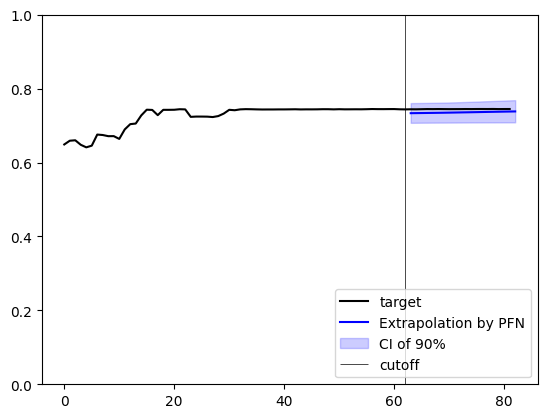

Curve index: 28
Dataset index: 72
Learner index: 11
Learner name: MLP
Curve length: 82

Characteristic groups for MLP:
- Peaking learner


In [25]:
random_idx = random.randint(0, len(train_curves) - 1)
curve = test_curves[34]  # Get curve from list
curve = curve[~np.isnan(curve)]  # Remove NaN values

y = torch.from_numpy(curve).float().unsqueeze(-1)
x = torch.arange(1, y.shape[0] + 1).unsqueeze(-1).float()  

# construct 
num_last_anchor = 20
cutoff = len(curve) - num_last_anchor
x_train = x[:cutoff]
y_train = y[:cutoff]
x_test = x[cutoff:]

qs = [0.05, 0.5, 0.95]
normalizer = lcpfn.utils.identity_normalizer()
y_train_norm = normalizer[0](y_train)

# forward
single_eval_pos = x_train.shape[0]
x = torch.cat([x_train, x_test], dim=0).unsqueeze(1)
y = y_train.unsqueeze(1)

logits = model((x, y), single_eval_pos=single_eval_pos)
predictions = normalizer[1](
    torch.cat([model.criterion.icdf(logits, q) for q in qs], dim=1)
)

x_test_np = x[cutoff:].detach().cpu().numpy().flatten()
pred_mean = predictions[:, 1].detach().cpu().numpy()
pred_lower = predictions[:, 0].detach().cpu().numpy()
pred_upper = predictions[:, 2].detach().cpu().numpy()

# plot
plt.plot(curve, "black", label="target")
plt.plot(x_test_np, pred_mean, "blue", label="Extrapolation by PFN")
plt.fill_between(x_test_np, pred_lower, pred_upper, color="blue", alpha=0.2, label="CI of 90%")
plt.vlines(cutoff, 0, 1, linewidth=0.5, color="k", label="cutoff")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

print(f"Curve index: 28")
print(f"Dataset index: {train_dataset_indices[28]}")
print(f"Learner index: {train_learner_indices[28]}")
print(f"Learner name: {LEARNER_ZOO[train_learner_indices[28]]}")
print(f"Curve length: {len(curve)}")

learner_idx = train_learner_indices[28]
print(f"\nCharacteristic groups for {LEARNER_ZOO[learner_idx]}:")
if learner_idx in flat_learners_indices:
    print("- Flat learner")
if learner_idx in mono_conv_learners_indices:
    print("- Mono & Convex learner")
if learner_idx in peaking_learner_indices:
    print("- Peaking learner")
if learner_idx in dipping_learner_indices:
    print("- Dipping learner")